Wine Quality Analysis Kumod Sharma

📝 Project Objective:

1. Develop a predictive model using machine learning algorithms to accurately assess and predict the quality of red wines based on various chemical properties and attributes.
2. Evaluate and compare the performance of different machine learning techniques to determine the most effective approach for red wine quality prediction, providing insights for potential applications in the wine industry.
3. Dataset Link:- Click to get the Dataset

🌟 Business Understanding:

1. Enhanced Product Quality: Accurate red wine quality prediction will lead to improved product quality and consistency, enhancing the winery's reputation and customer satisfaction.
2. Cost Optimization: Optimal resource allocation and reduced wastage through predictive modeling will result in cost savings for wineries, improving overall operational efficiency.
3. Market Competitiveness: Consistent production of high-quality red wines will give wineries a competitive advantage, allowing them to stand out in the market and attract more customers.

Add this to your Homewrok
I want you to pick the most important 5 things out of this table contents and tell me which could be grouped together under a single label
5 things you need to do when you are doing machine learning 

📊 Table of Contents:

1. 📚 Importing Libraries: - To perform Data Manipulation,Visualization & Model Building.
2. ⏳ Loading Dataset: - Load the dataset into a suitable data structure using pandas.
3. 🧠 Basic Understaning of Data: - Generate basic informations about the data.
4. 🧹 Data Cleaning: - To clean, transform, and restructure the data in order to make it suitable for analysis.
5. 📊 Exploatory Data Analysis: - To identify trends, patterns, and relationships among the variabels.
6. 📈 Feature Selection: - To identify most relevant features for model building.
7. ⚙️ Data Preprocessing: - To transform data for creating more accurate & robust model.
8. 🎯 Model building:- To build predictive models, using various algorithms.
9. ⚡️ Model evaluation: - To analyze the Model performance using metrics.
10. 🍀 Stacking Model:- To develop a stacked model using the top performing models.
11. 🎈 Conclusion: - Conclude the project by summarizing the key findings.

In [3]:
!pip3 install scipy
!pip3 install matplotlib
!pip3 install pandas
!pip3 install scikit-learn
!pip3 install seaborn
!pip3 install catboost
!pip3 install xgboost
# !pip3 install ligthgbm
!pip3 install imblearn


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(style="darkgrid",font_scale=1.5)
sns.set(rc={"axes.facecolor":"#FFFAF0","figure.facecolor":"#FFFAF0"})
sns.set_context("poster",font_scale = .7)

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from scipy import stats
from scipy import special
from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier
# from catboost import CatBoostClassifier


from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

from imblearn.over_sampling import SMOTE

print("no install or import problems")


no install or import problems


In [5]:
#wine_data = pd.read_csv("https://hub.ovh2.mybinder.org/user/jac141-academicconnections-9ttrpc22/lab/tree/ClassFiles2024/winequality-red.csv")
wine_data = pd.read_csv("winequality-red.csv")


In [6]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
wine_data.head().style.set_properties(**{'background-color': '#E9F6E2','color': 'black','border-color': '#8b8c8c'})

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5
1,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.996800,3.200000,0.680000,9.800000,5
2,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.997000,3.260000,0.650000,9.800000,5
3,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.998000,3.160000,0.580000,9.800000,6
4,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5


In [9]:
wine_data.shape

(1599, 12)

📊 Inference:
There are total 1599 Records/Rows in the dataset.
There are total 12 Features/columns in the dataset.

In [10]:
wine_data.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Columns: 12 entries, fixed acidity to quality
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


📊 Inference:
All the features present is in the dataset is numerical.
No Categorical Features present in the dataset.

In [12]:
null_wine_df = wine_data.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
null_wine_df["% of Missing values"] = round(100*null_wine_df["Total No. of Missing Values"]/len(wine_data),2)
null_wine_df.sort_values(by="% of Missing values",ascending=False)


,Total No. of Missing Values,% of Missing values
fixed acidity,0,0.0
volatile acidity,0,0.0
citric acid,0,0.0
residual sugar,0,0.0
chlorides,0,0.0
free sulfur dioxide,0,0.0
total sulfur dioxide,0,0.0
density,0,0.0
pH,0,0.0
sulphates,0,0.0


📊 Inference:
None of the features is hvaing missing values.
So we can say the dataset will be more reliable for prediction wine quality.

In [15]:
#Good piece of Homework for you guys is to look up pandas duplicated to see if there is any information that you can learn 

print("Is there any Duplicate Records => ",wine_data.duplicated().any())
print("-"*42)
print("Total Duplicate Records present is =>",wine_data[wine_data.duplicated()==True].shape[0])

Is there any Duplicate Records =>  True
------------------------------------------
Total Duplicate Records present is => 240


💬 Inference:
The first output is True which indicates that is presenece of Duplicate Records.
The second output is 240 which indicates that there is total 240 Duplicate Records.
Duplicate vlaues can lead to Data Integrity issues so it's better to drop these records.

In [18]:
wine_data.drop_duplicates(inplace=True)

In [21]:
wine_data.describe().T.style.set_properties(**{'background-color': '#E9F6E2','color': 'black','border-color': '#8b8c8c'})

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1359.000000,8.310596,1.736990,4.600000,7.100000,7.900000,9.200000,15.900000
volatile acidity,1359.000000,0.529478,0.183031,0.120000,0.390000,0.520000,0.640000,1.580000
citric acid,1359.000000,0.272333,0.195537,0.000000,0.090000,0.260000,0.430000,1.000000
residual sugar,1359.000000,2.523400,1.352314,0.900000,1.900000,2.200000,2.600000,15.500000
chlorides,1359.000000,0.088124,0.049377,0.012000,0.070000,0.079000,0.091000,0.611000
free sulfur dioxide,1359.000000,15.893304,10.447270,1.000000,7.000000,14.000000,21.000000,72.000000
total sulfur dioxide,1359.000000,46.825975,33.408946,6.000000,22.000000,38.000000,63.000000,289.000000
density,1359.000000,0.996709,0.001869,0.990070,0.995600,0.996700,0.997820,1.003690
pH,1359.000000,3.309787,0.155036,2.740000,3.210000,3.310000,3.400000,4.010000
sulphates,1359.000000,0.658705,0.170667,0.330000,0.550000,0.620000,0.730000,2.000000


💬 Inference:
The minimum wine quality is 3 and the maximum wine quality is 8.
The average alchol a red wine holds according to the data is 10.4.
There a huge difference between average total sulfur dioxide and maximum total sulfur dioxide.

1. Visualizing the Target Variable

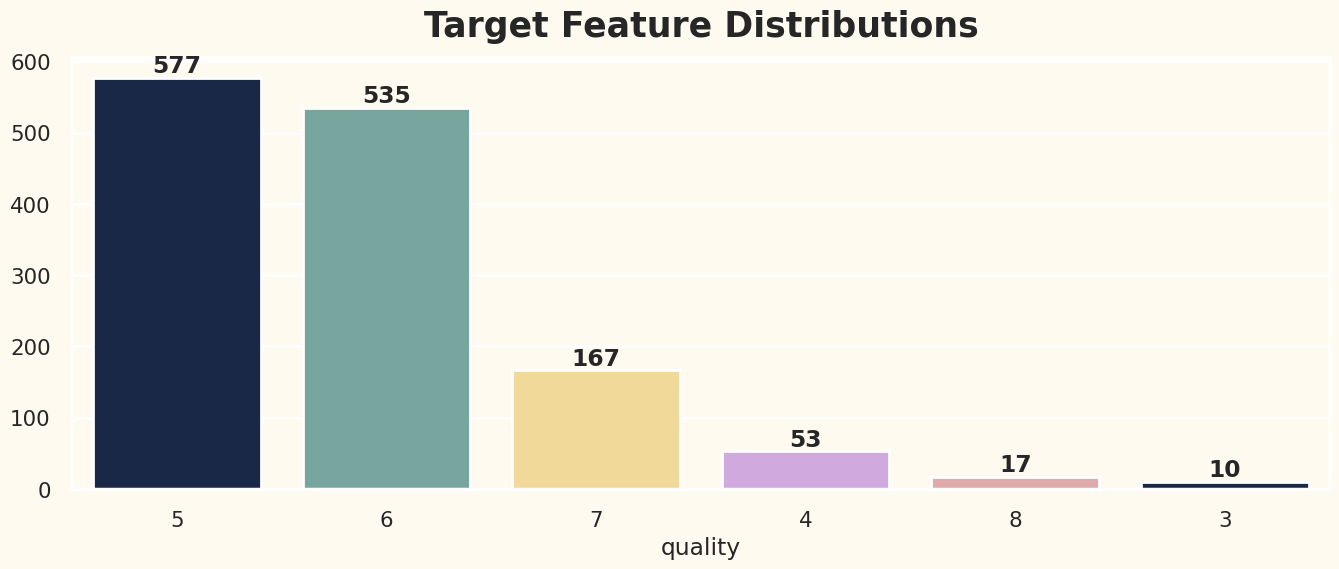

In [23]:
plt.figure(figsize=(13.7,6))
z = wine_data["quality"].value_counts()
sns.barplot(x=z.index, y=z.values, order=z.index, palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
plt.title("Target Feature Distributions",fontweight="black",size=25,pad=15)
for index,value in enumerate(z.values):
    plt.text(index,value,value, ha="center", va="bottom",fontweight="black")

plt.tight_layout()
plt.show()

💬 Inference:
Most of the wines are having quality of 5 or 6.
We can clearly observe a class-imbalance in the target feature.
To overcome the class-imbalance we can use techniques like:-

SMOTE (synthetic minority oversampling technique).

Stratified K-Folds cross-validation.

Note: In this project I have use Stratified K-Fold Cross-Validaton.

2. Visualizing "Fixed Acidity" Attribute.

In [28]:
def numerical_plot(column):
    plt.figure(figsize=(13.5,10))
    plt.subplot(2,1,1)
    sns.boxplot(x="quality",y=column, data=wine_data, palette=["#FFA07A","#D4A1E7","#FFC0CB","#87CEFA","#F08080","#D8BFD8"])
    plt.title(f"{column.title()} vs Quality Analysis",fontweight="black",size=25,pad=10,)

    plt.subplot(2,1,2)
    sns.histplot(x=column,kde=True,hue="quality",data=wine_data, palette="Set2")
    skew = wine_data[column].skew()
    plt.title(f"Skewness of {column.title()} Feature is: {round(skew,3)}",fontweight="black",size=20,pad=10)
    plt.tight_layout()
    plt.show()

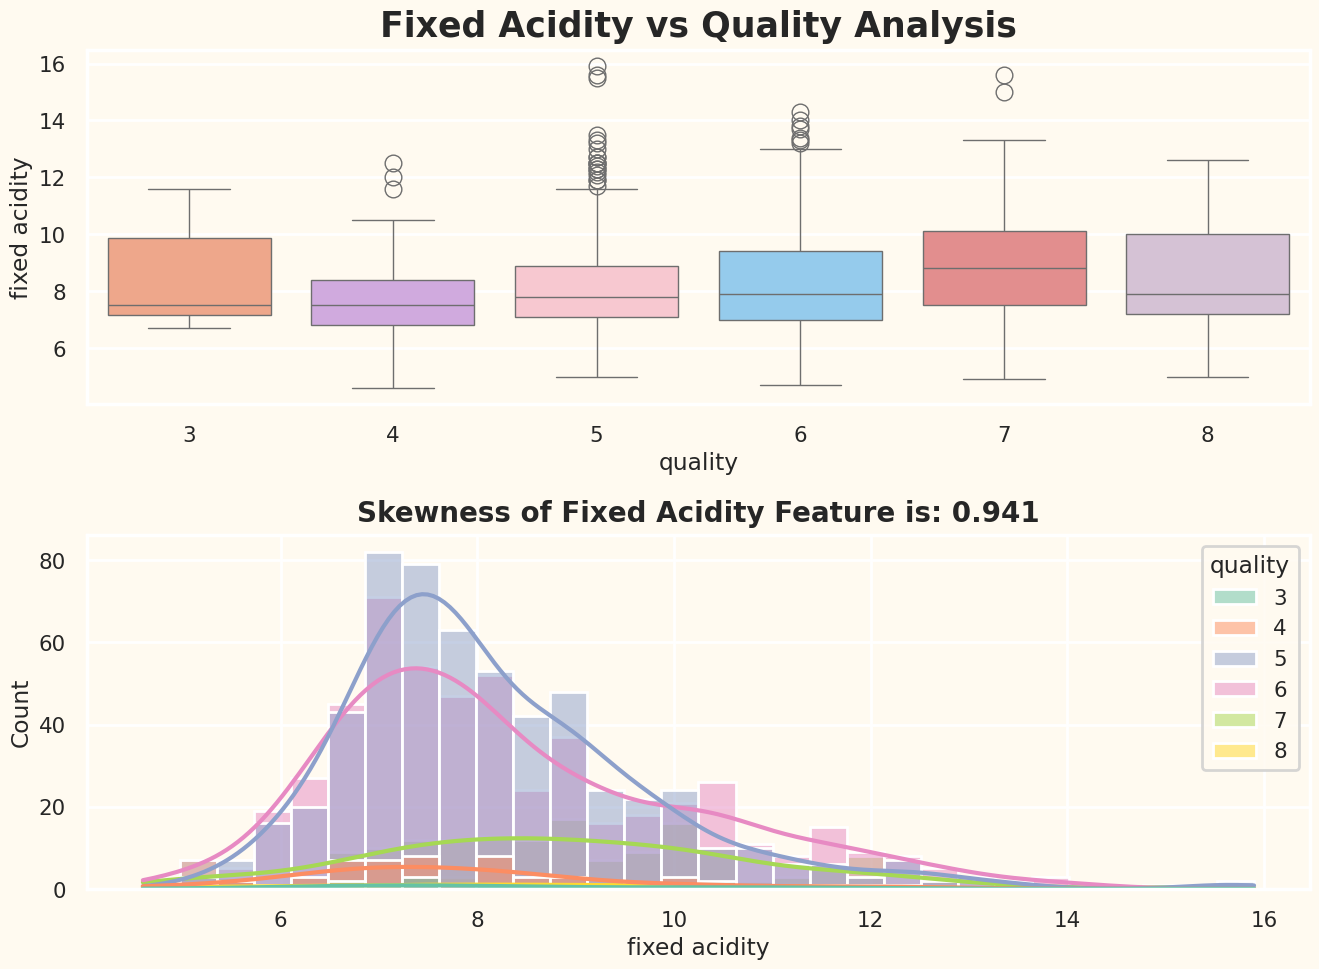

In [29]:
numerical_plot("fixed acidity")

 Inference:
The feature fixed acidity is having almost a symmetric distribution but the distribution is little right skewed with a skewness value of 0.941.
Skewness can lead to several implications like model performance, hypothesis testing and it returns biased estimation.
So we will use tranformation techniques to transform thesse feature to have a symmetric distribution.

3. Visualizing "Volatile Acidity" Attribute.

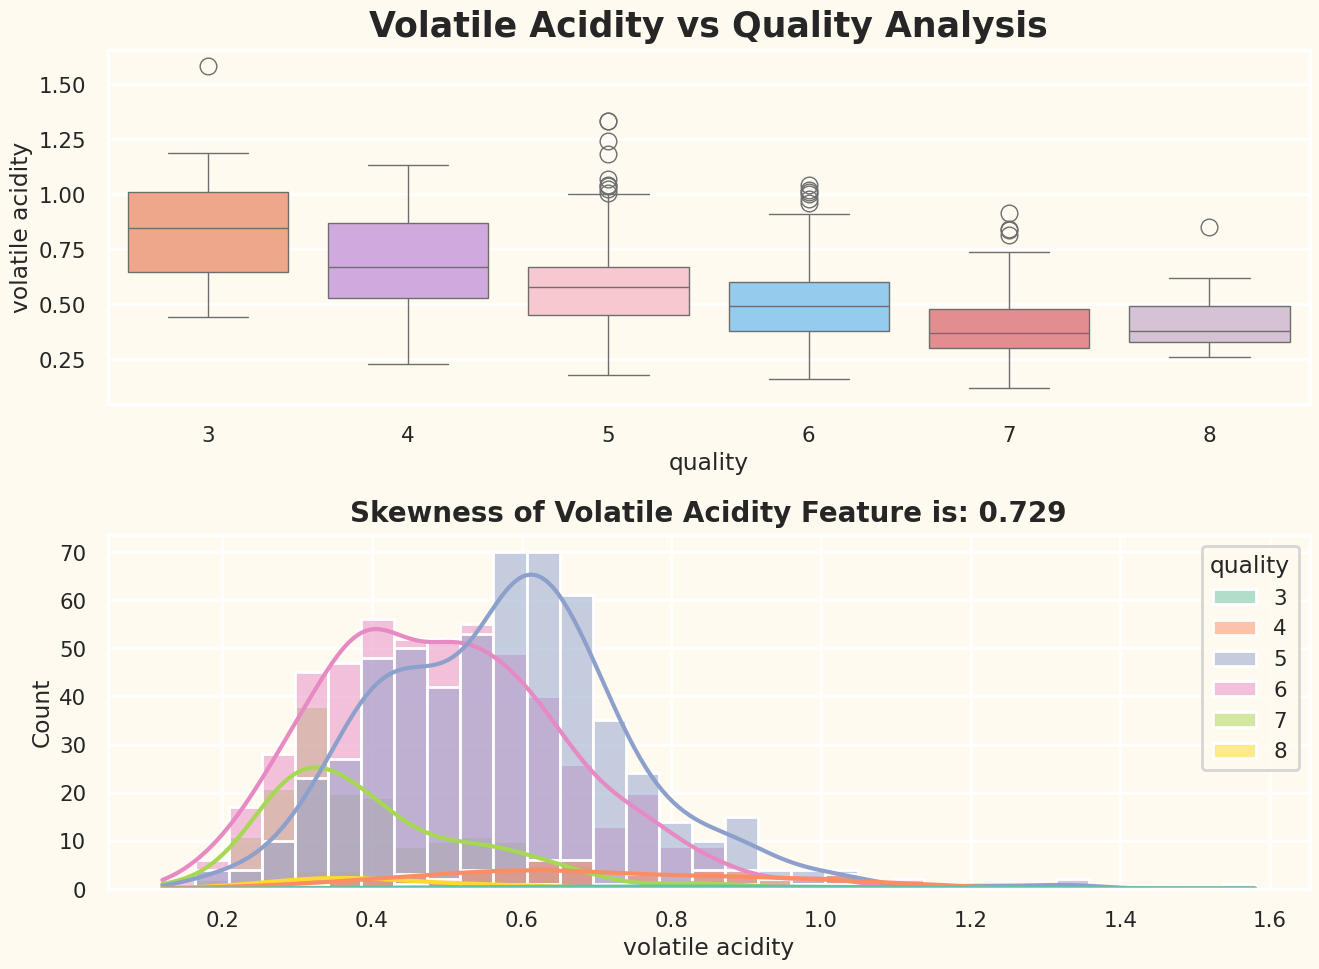

In [30]:
numerical_plot("volatile acidity")

💬 Inference:
The feature Volatile Acidity is having almost a symmetric distribution but the distribution is right skewed with a skewness value of 0.729..
Skewness can lead to several implications like model performance, hypothesis testing and it returns biased estimation.
So we will use tranformation techniques to transform thesse feature to have a symmetric distribution.

4. Visualizing "Citric Acid" Attribute.

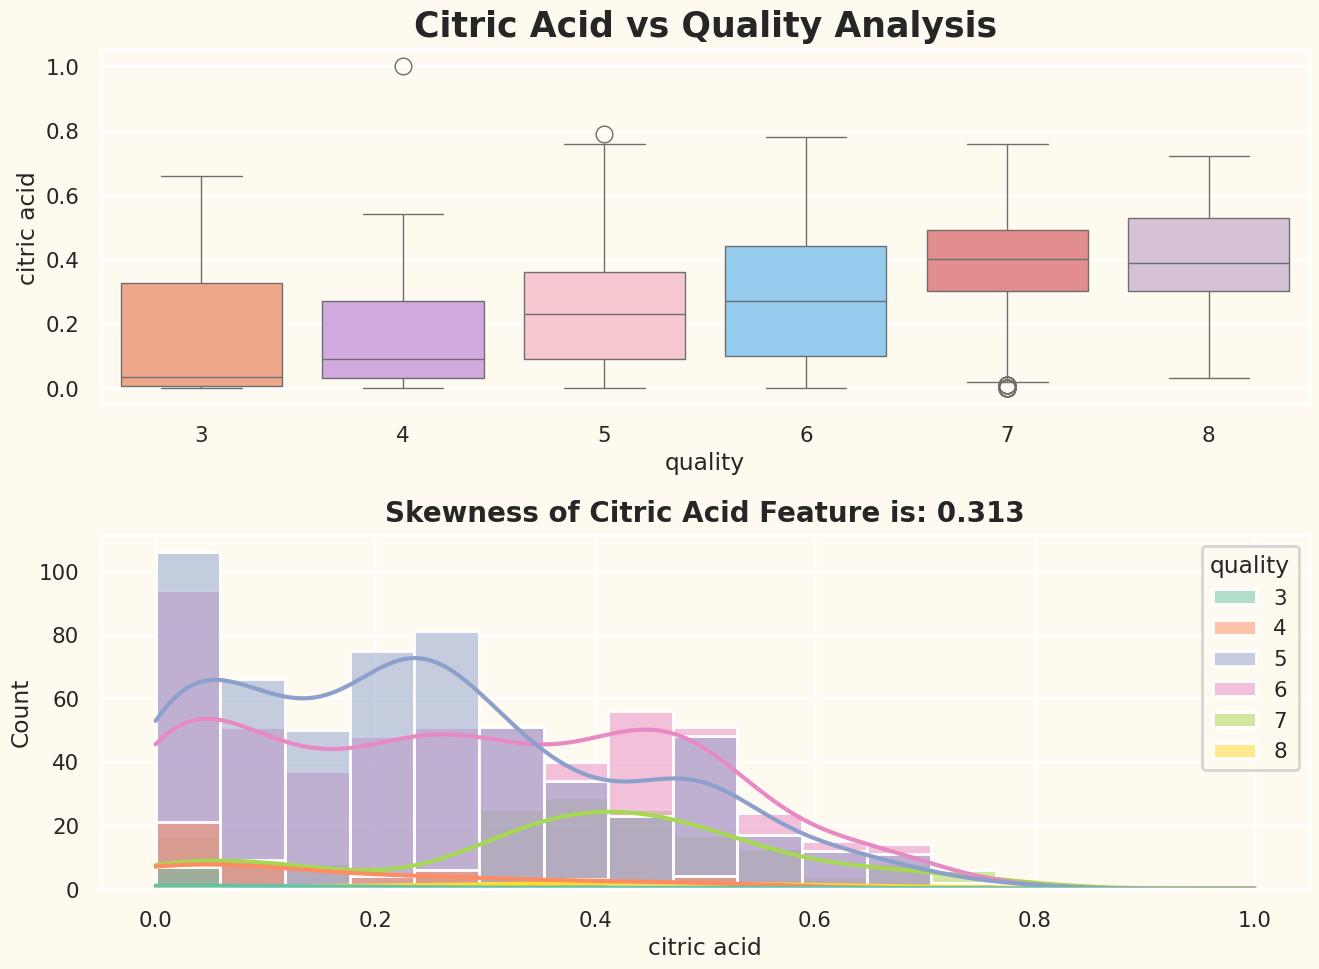

In [31]:
numerical_plot("citric acid")

💬 Inference:
The feature Citric Acid is having a distribution of right skewed with a skewness value of 0.313.
Although the skewness is low but still we try to bring the skewness close to 0.
So we will use tranformation techniques to transform thesse feature to have a symmetric distribution.

5. Visualizing "Residual Sugar" Attribute.

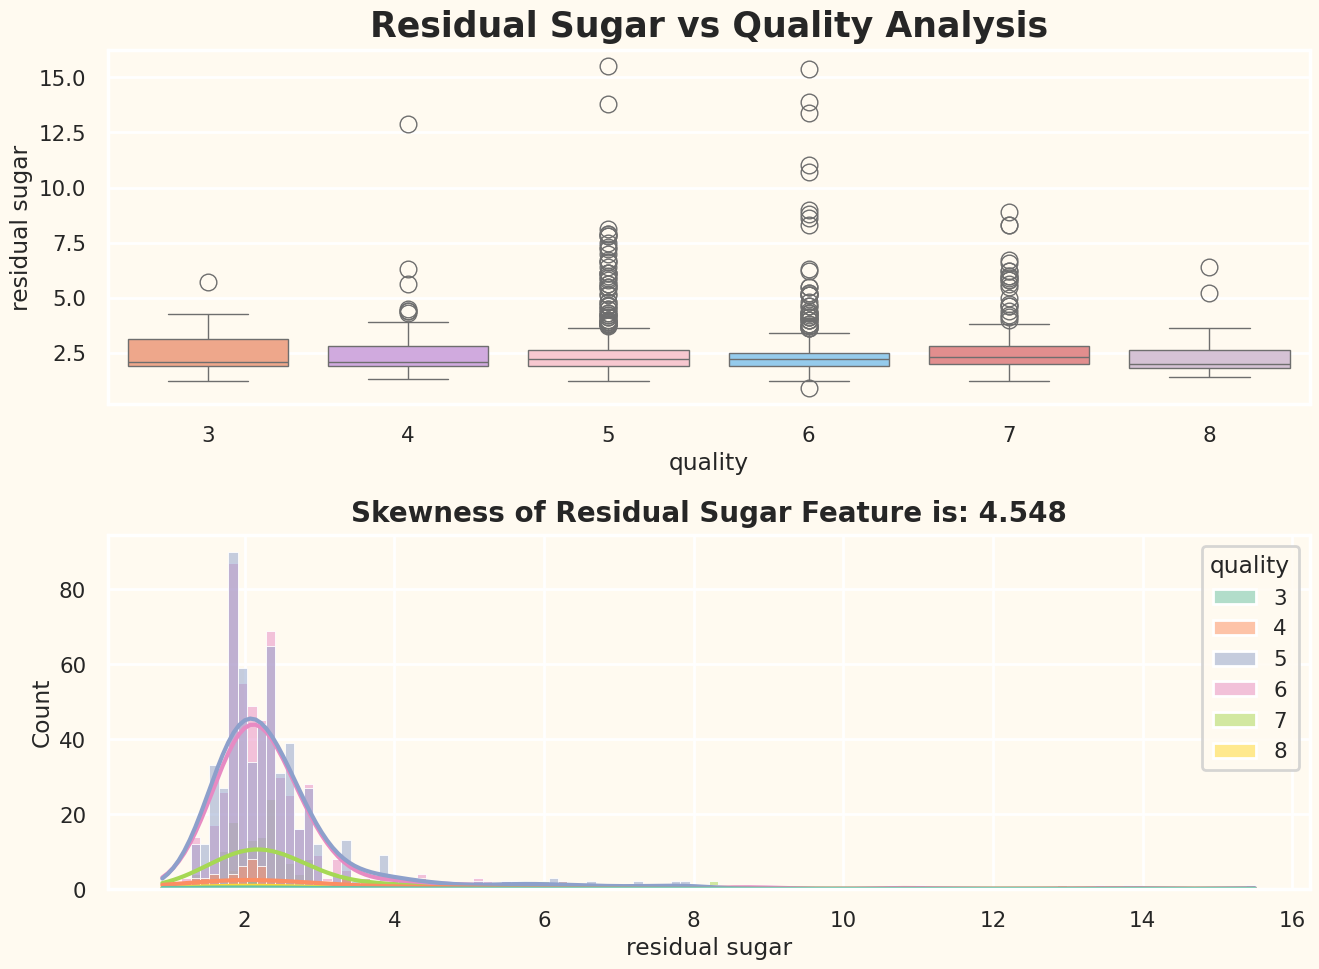

In [34]:
numerical_plot("residual sugar")

💬 Inference:
The feature Residual Sugar is having almost a symmetric distribution but the distribution is highly right skewed with a skewness value of 4.548.
The distrbution is highly right skewed because of presence of outliers.
So we will use tranformation techniques to transform thesse feature to have a symmetric distribution and bring skewness close to 0.

6. Visualizing "Chlorides" Attribute.

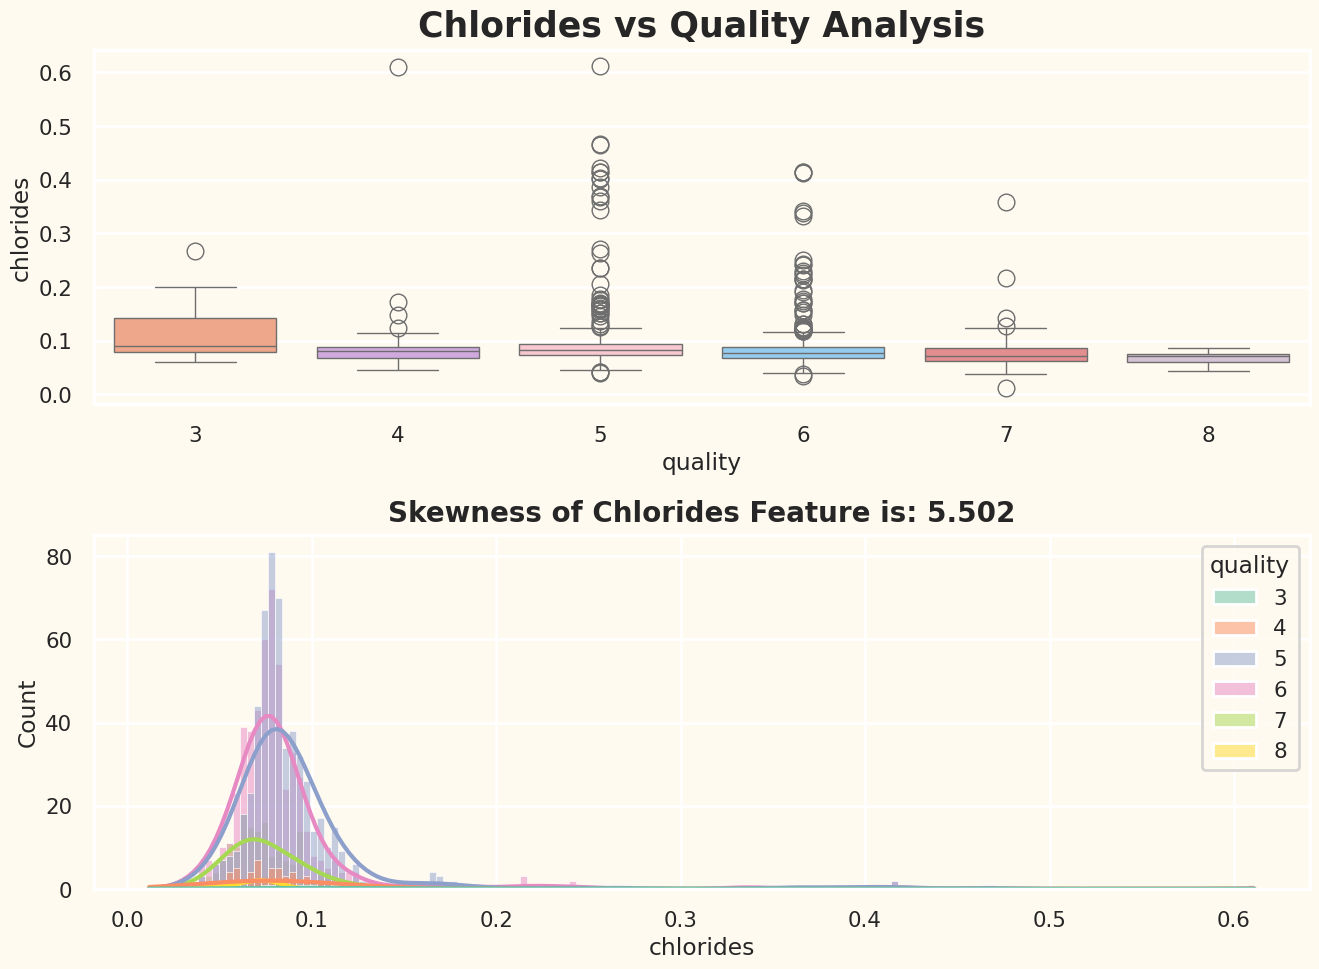

In [36]:
numerical_plot("chlorides")

💬 Inference:
The feature Chlorides is having almost a symmetric distribution but the distribution is highly right skewed with a skewness value of 5.502..
The distrbution is highly right skewed because of presence of outliers.
So we will use tranformation techniques to transform thesse feature to have a symmetric distribution and bring skewness close to 0.

7. Visualizing "Free Sulfur Dioxide" Attribute.

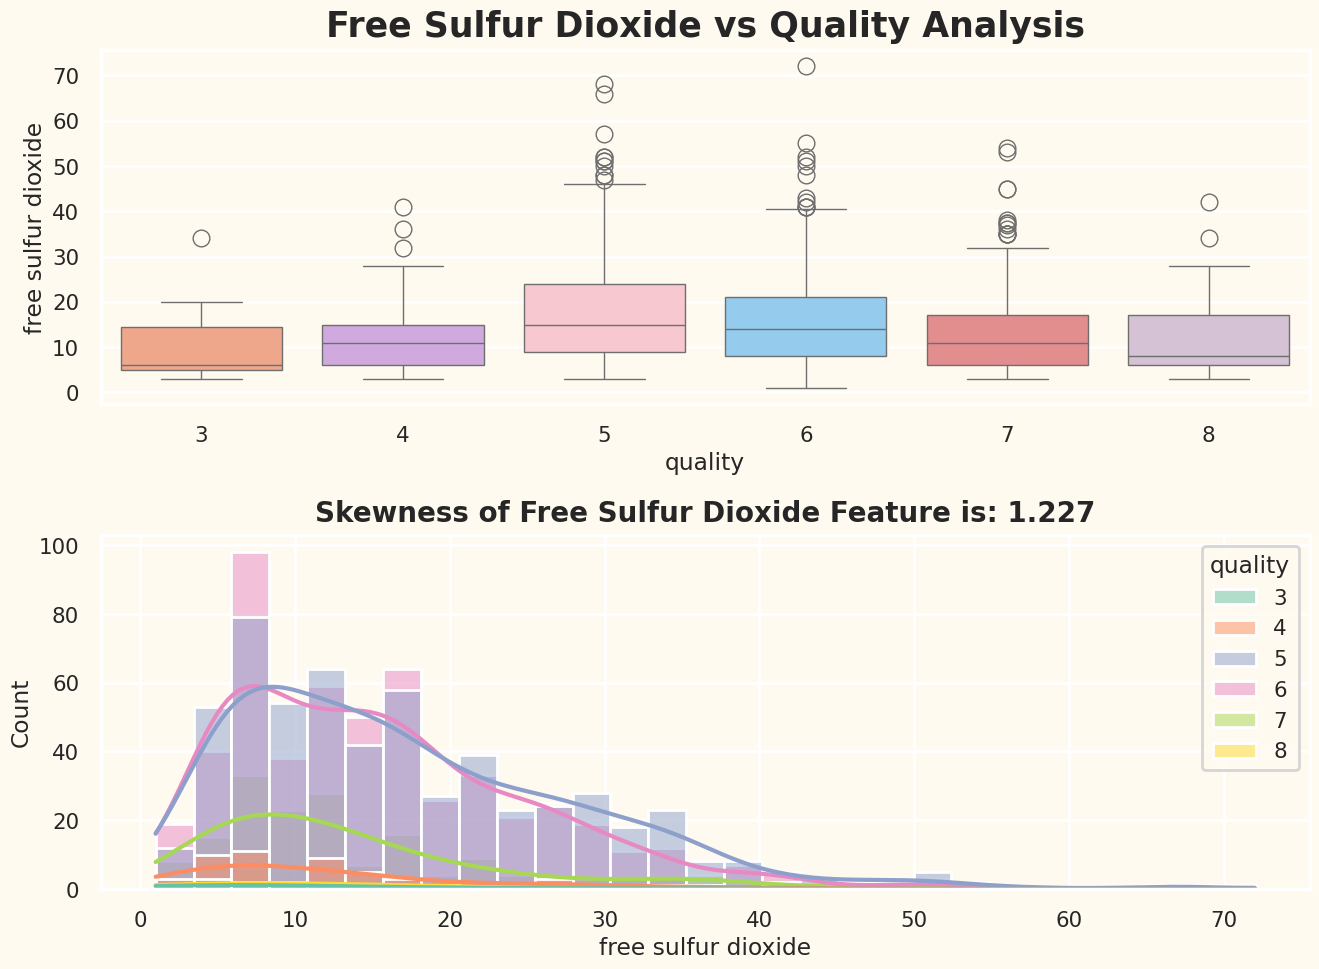

In [37]:
numerical_plot("free sulfur dioxide")

💬 Inference:
The feature Free Sulfur Dioxide is having a highly right skewed distribution with a skewness value of 1.227..
The distrbution is highly right skewed because of presence of outliers.
So we will use tranformation techniques to transform thesse feature to have a symmetric distribution and bring skewness close to 0.

8. Visualizing "Total Sulfur Dioxide" Attribute.

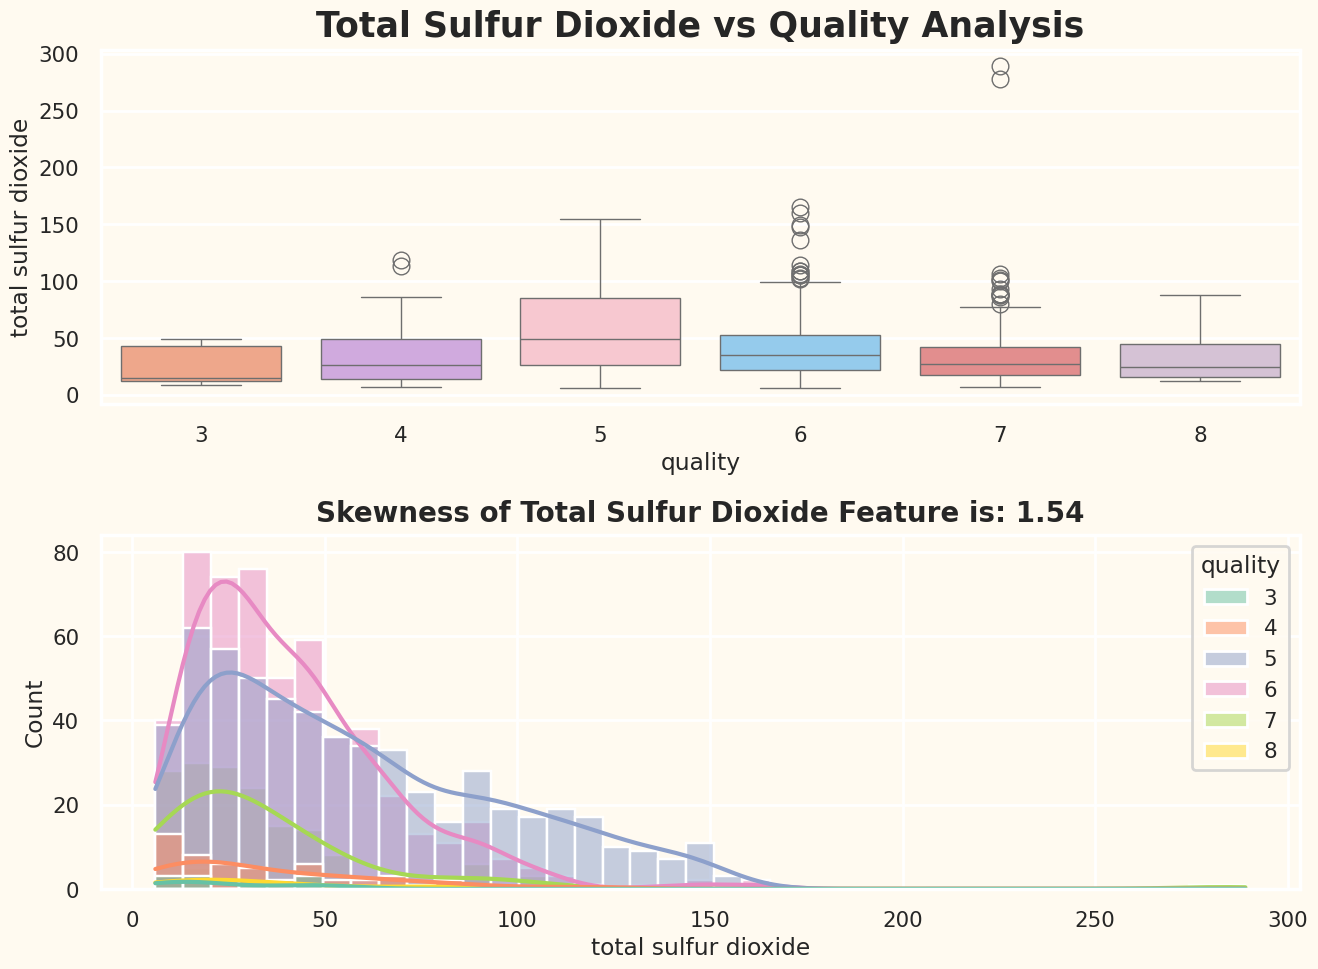

In [38]:
numerical_plot("total sulfur dioxide")

💬 Inference:
The feature Total Sulfur Dioxide is having a highly right skewed distribution with a skewness value of 1.54.
The distrbution is highly right skewed because of presence of outliers.
So we will use tranformation techniques to transform thesse feature to have a symmetric distribution and bring skewness close to 0.

9. Visualizing "Density" Attribute.

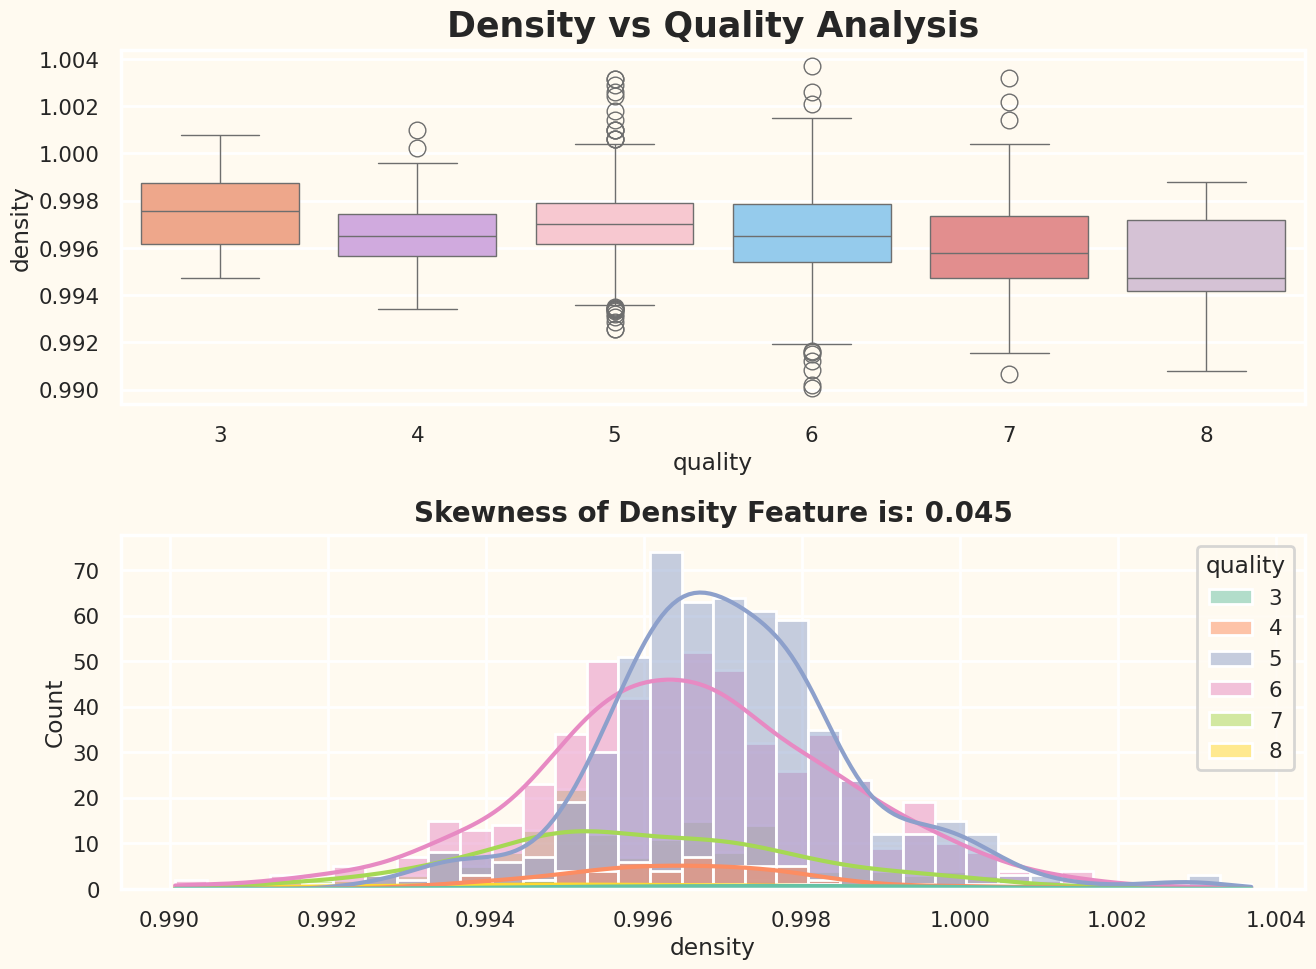

In [39]:
numerical_plot("density")

💬 Inference:
The feature Density is having a perfect Noraml Distribution because the skewness is close to 0.
So we don't have to use aany transformation techniques on this feature.

10. Visualizing "pH" Attribute.

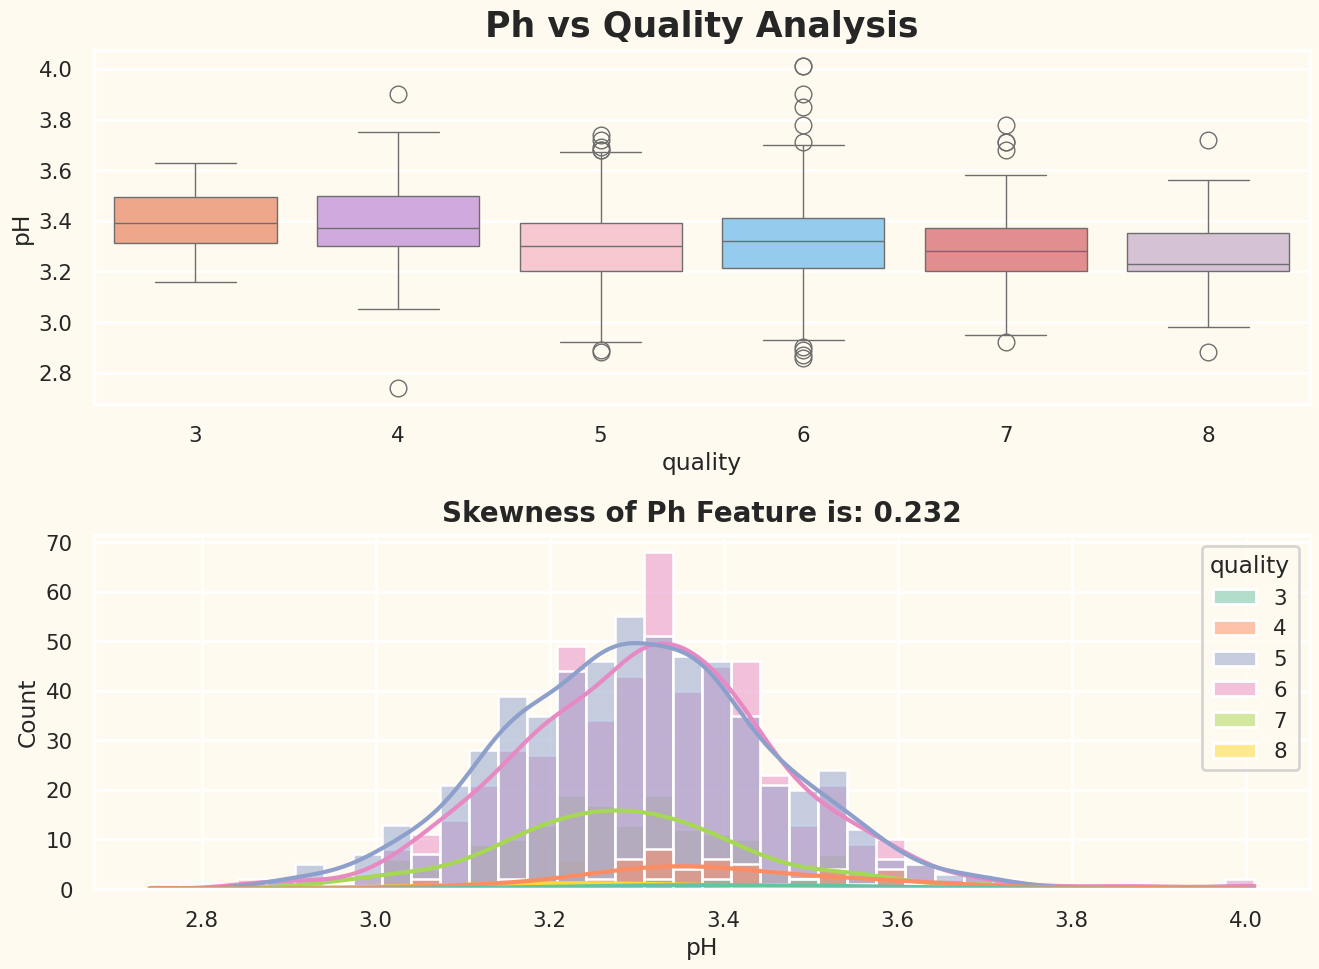

In [40]:
numerical_plot("pH")

💬 Inference:
The feature pH is having a Normal Distribution with a skewness value of 0.232..
But still the tails is little right skewed because of presence of outliers.
So we will use transformation techniques to deal with those outliers.

11. Visualizing "Sulphates" Attribute

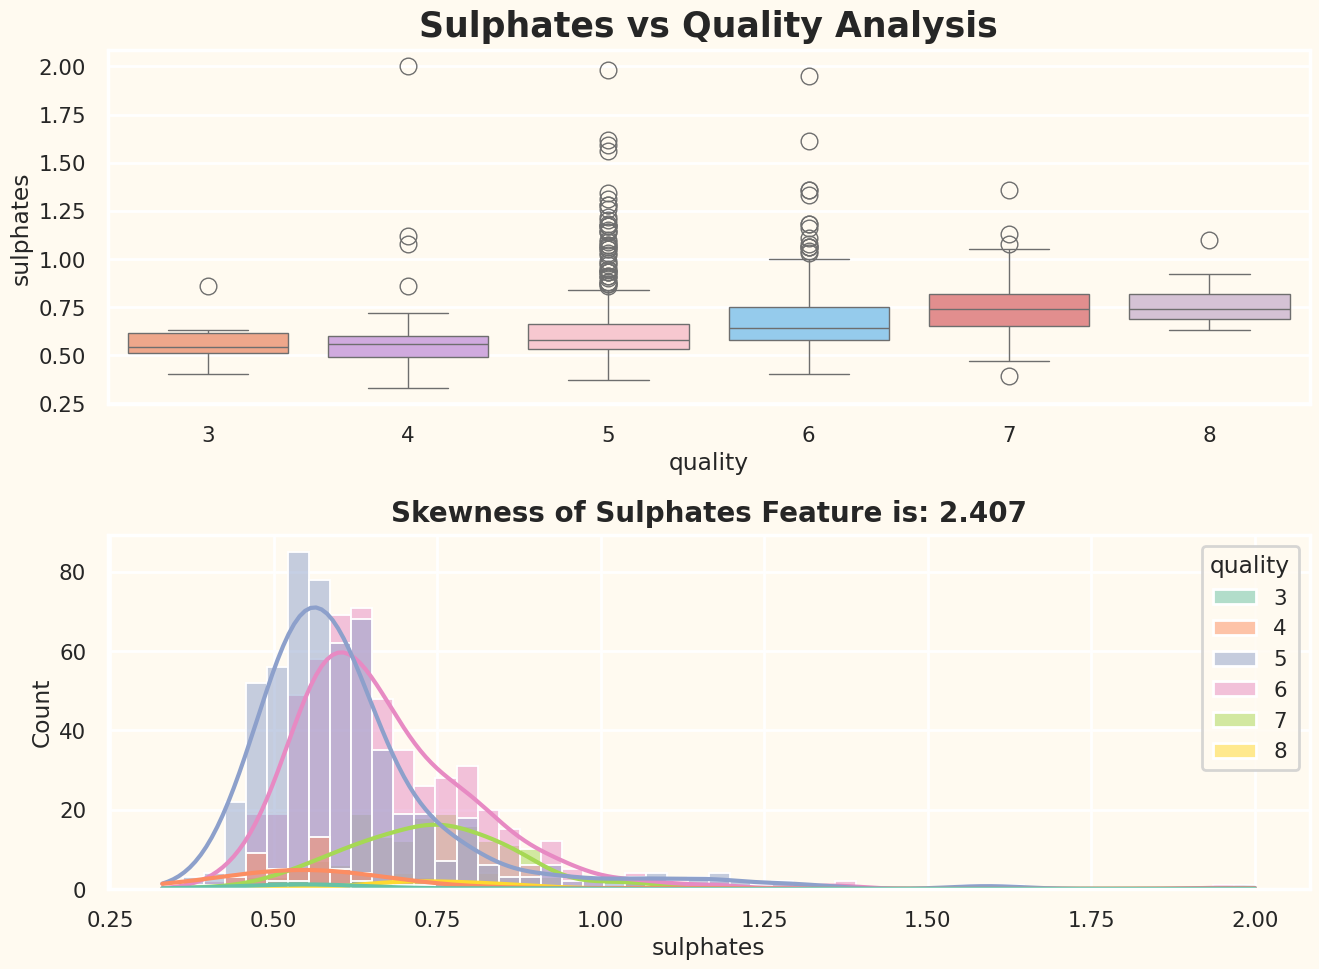

In [41]:
numerical_plot("sulphates")

💬 Inference:
The feature Sulphates is having almost a symmetric distribution but the distribution is highly right skewed with a skewness value of 2.407.
The distrbution is highly right skewed because of presence of outliers.
So we will use tranformation techniques to transform thesse feature to have a symmetric distribution and bring skewness close to 0.

12. Visualizing "Alcohol" Attribute.

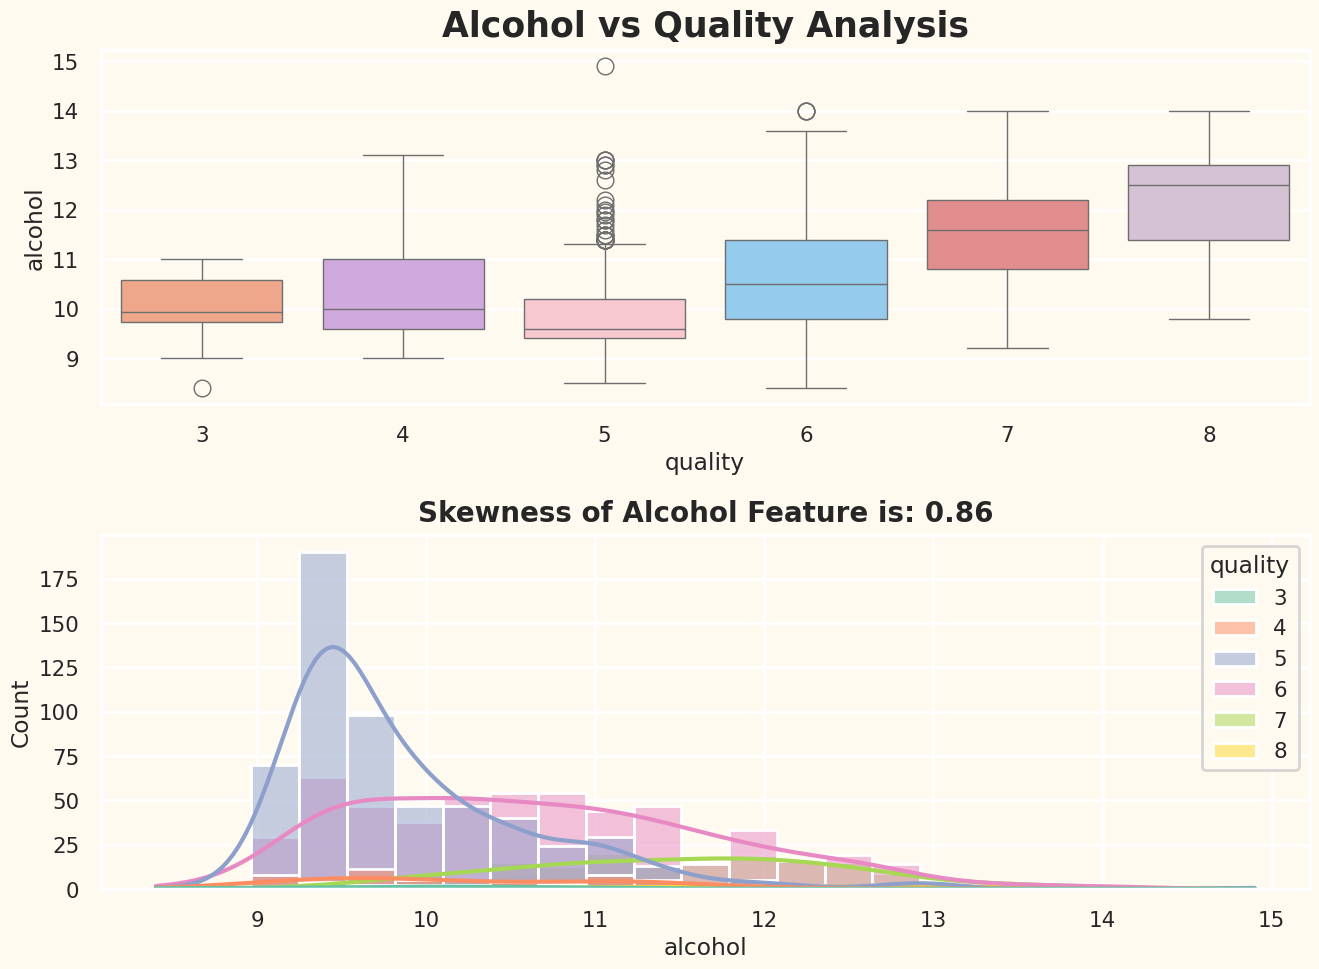

In [42]:
numerical_plot("alcohol")

💬 Inference:
The feature Alcohol is having Asymmetric Distribution and the distribution is highly right skewed with a skewness value of 0.86.
The distrbution is highly right skewed because of presence of outliers.
So we will use tranformation techniques to transform thesse feature to have a symmetric distribution and bring skewness close to 0.

13. Visualizing Correlation Among the Independent Atrributes.

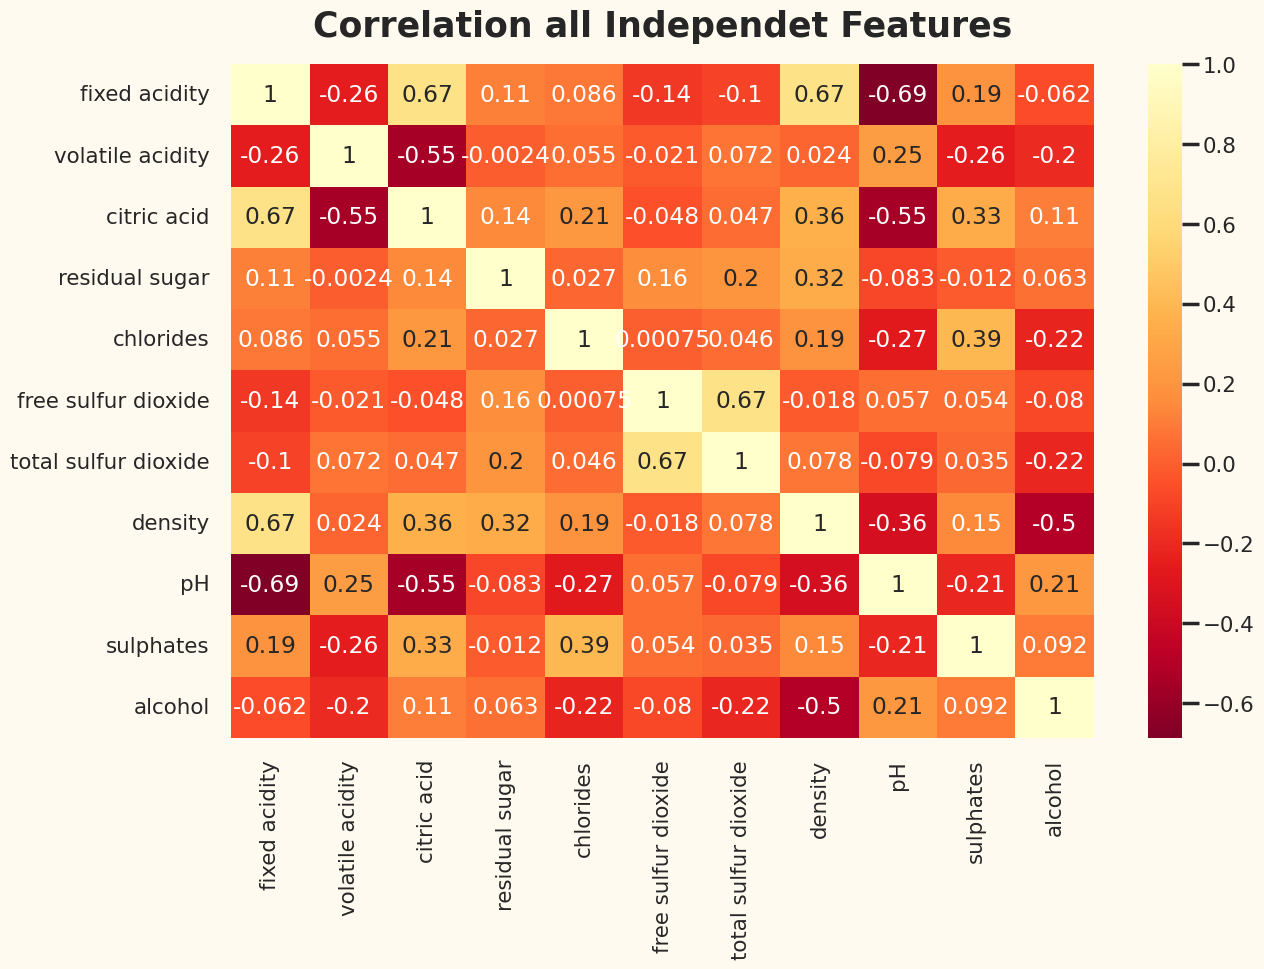

In [43]:
# HW Problem Play around with this to make it more readable

columns = wine_data.columns.tolist()
columns.remove("quality")  ##Quality is having discrete values that's why it's not the correct way to check its importane.

corr = wine_data[columns].corr()

plt.figure(figsize=(13.5,10))

sns.heatmap(corr,fmt=".2g",annot=True ,cmap='YlOrRd_r')
plt.title("Correlation all Independet Features",fontweight="black",size=25,pad=20)
plt.tight_layout()
plt.show()

💬 Inference:
Many features are having high correlation with the other features:-

Fixed Acidity is having high correlation with citric acid and pH and vice-versa.

Volatile Acidity is having high correlation with citric acid adn vice-versa.

Free Sulfur Dioxide is having high correlation with total sulfur dioxide, pH, Sulphates and vice-versa.

Density is having high correaltion with fixed acidity, alcohol and vice-versa.

Note:

We can't drop these correlated features because these features helps algorithms to create pattern for prediction.

📈 Statistical Analysis - Feature Importance.📈


1. Performing ANOVA Test to Analyze the Features Importance in Wine Quality.

In [44]:
f_scores = {}
p_values = {}

for column in columns:
    f_score, p_value = stats.f_oneway(wine_data[column],wine_data["quality"])
    
    f_scores[column] = f_score
    p_values[column] = p_value

2. Visualizing the F_Score of ANOVA Test of Features.

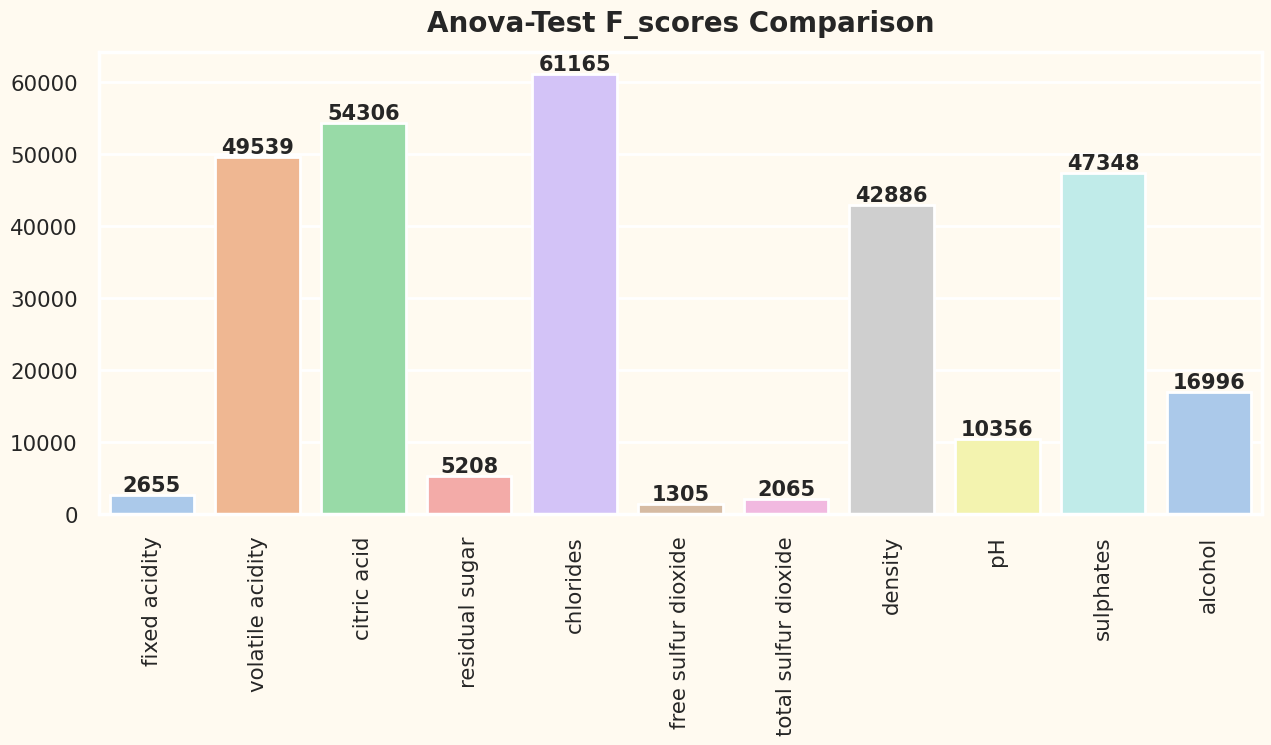

In [45]:
plt.figure(figsize=(15,6))
keys = list(f_scores.keys())
values = list(f_scores.values())

sns.barplot(x=keys, y=values, palette="pastel")
plt.title("Anova-Test F_scores Comparison",fontweight="black",size=20,pad=15)
plt.xticks(rotation=90)

for index,value in enumerate(values):
    plt.text(index,value,int(value), ha="center", va="bottom",fontweight="black",size=15)
plt.show()

3. Comparing F_Score and P_value of ANOVA Test.

In [46]:
test_df = pd.DataFrame({"Features":keys,"F_Score":values})
test_df["P_value"] = list(p_values.values())

In [47]:
test_df

,Features,F_Score,P_value
0,fixed acidity,2655.845015,0.000000e+00
1,volatile acidity,49539.593421,0.000000e+00
2,citric acid,54306.384723,0.000000e+00
3,residual sugar,5208.846019,0.000000e+00
4,chlorides,61165.590080,0.000000e+00
5,free sulfur dioxide,1305.174212,9.870616e-234
6,total sulfur dioxide,2065.769716,0.000000e+00
7,density,42886.542390,0.000000e+00
8,pH,10356.486605,0.000000e+00
9,sulphates,47348.789169,0.000000e+00


In [ ]:
💬 Inference:
The following features showed statistically significant associations with wine quality:
    
Volatile Acidity.
    
Citric Acid.
    
Chlorides.
    
Density.
    
pH.

Sulphates.

Alcohol.
    
The following features did not show statistically significant associations with wine quality.
    
Fixed Acidity.
    
Residual Sugar.
    
Free Sulfur Dioxide.
    
Total Sulfur Dioxide.
    
Note:
Expect Residual Sugar feature the other 3 features were having high correlation with other independent features.
So we can't drop those 3 features but if required we can drop the Residual Sugar feature.